# Data Science & Business Analytics at The Sparks Foundation 
**TASK 1 :Prediction using Supervised ML**

**Aim:**
To predict the percentage of a student on the basis of number of hours studied using linear Regression supervised ML.

**steps:**
> * Importting the data
> * Visualizing the data
> * Data preparation
> * Training the model
> * Visualization the model
> * Predicting and Testing the model
> * Evaluting the model

**Linear Regression**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#To find the number of rows and columns
data.shape

(25, 2)

In [4]:
#Describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#find null counts & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#correlation coefficient between the two variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
#check null or missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Step 2: Visualizing the data**

plot the dataset to check the relationship between the two variables or not

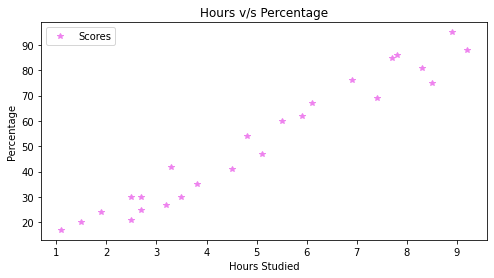

In [8]:
data.plot(x="Hours", y="Scores", style="*",figsize=(8,4),color="violet")
plt.title("Hours v/s Percentage") 
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

**Step 3:**

split the data into two parts(train data & test data)by using Scikit-Learn's built-in train_test_split() method

In [9]:
#Divide the data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
#Split the data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

**Step 4:**

Training Simple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)
#Plotting the regression line
reg=lr.coef_*x+lr.intercept_

Intercept: 
 2.370815382341881
Coefficients: 
 [9.78856669]


**Step 5:**
    
Visualization the model

Text(0, 0.5, 'percentage')

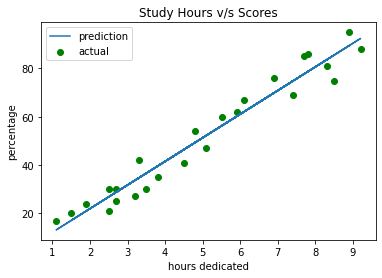

In [13]:
#plot the fit line over the data in single linear regression
a = lr.coef_
b = lr.intercept_
plt.plot(x, a*x+b)
plt.scatter(x,y,color='green')
plt.legend(['prediction','actual'])
plt.title('Study Hours v/s Scores')
plt.xlabel("hours dedicated")
plt.ylabel("percentage")

In [14]:
#Predicting the score for 9.25 hours/day
hour=9.25 
hr=np.array(hour) 
hr=hr.reshape(1,1)
prediction=lr.predict(hr)
print("The number of hours student studied is = {}".format(hour))
print("The predicted score is = {}".format(prediction[0]))

The number of hours student studied is = 9.25
The predicted score is = 92.91505723477056


**Step 6:**
    
Predicting and Testing the model

In [15]:
print(x_test)
ypred=lr.predict(x_test)
print("predicted:",ypred)
print("actual:",y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
predicted: [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
actual: [20 27 69 30 62 35 24 86]


**Step 7:**
    
Evaluting the model

In [16]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse=(mean_absolute_error(y_test,ypred))
print("The Mean Absolute Error is =",mse)
rmse=(np.sqrt(mean_squared_error(y_test,ypred)))
print("The Root Mean Square Error is =",rmse)

#To find coefficient of determination
r2=r2_score(y_test,ypred)
print("The R-square is =",r2)

The Mean Absolute Error is = 4.419727808027652
The Root Mean Square Error is = 4.792191274636315
The R-square is = 0.9568211104435257
